# 实现多层神经网络

### 导入库，设置GPU模式

In [1]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [2]:
#导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#设置GPU模式
gpus=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0],True)

### 加载数据，转为numpy数组

In [4]:
#下载数据
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

TEST_URL="http://download.tensorflow.org/data/iris_test.csv"
test_path=tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

In [5]:
#读取下载的数据中的csv文件
df_iris_train=pd.read_csv(train_path,header=0)
df_iris_test=pd.read_csv(test_path,header=0)

In [6]:
#将数据转为numpy数组
iris_train=np.array(df_iris_train)
iris_test=np.array(df_iris_test)

In [7]:
iris_train.shape,iris_test.shape

((120, 5), (30, 5))

### 数据预处理

In [8]:
x_train=iris_train[:,0:4]#数据前四列为特征
y_train=iris_train[:,4]#数据第五列为品种

x_test=iris_test[:,0:4]
y_test=iris_test[:,4]

In [9]:
x_train.shape,y_train.shape

((120, 4), (120,))

In [10]:
x_test.shape,y_test.shape

((30, 4), (30,))

In [11]:
#数据中心化
x_train=x_train-np.mean(x_train,axis=0)
x_test=x_test-np.mean(x_test,axis=0)

In [12]:
X_train=tf.cast(x_train,tf.float32)#训练集输入数据类型修改为32位浮点型
Y_train=tf.one_hot(tf.constant(y_train,dtype=tf.int32),3)#训练集输出数据类型改为独热编码

X_test=tf.cast(x_test,tf.float32)
Y_test=tf.one_hot(tf.constant(y_test,dtype=tf.int32),3)####

In [13]:
X_train.shape,Y_train.shape

(TensorShape([120, 4]), TensorShape([120, 3]))

In [14]:
X_test.shape,Y_test.shape

(TensorShape([30, 4]), TensorShape([30, 3]))

### 设置超参数和显示间隔

In [15]:
learn_rate=0.5#设置学习率为0.5
iter=50#迭代次数为50次
display_step=10#显示间隔为10，每迭代10次，显示一次结果

### 设置模型参数初始值

In [16]:
np.random.seed(612)#随机数种子为612
W1=tf.Variable(np.random.randn(4,16),dtype=tf.float32)#设置第一层网络的权值W1数据类型为（4，16）的随机数矩阵
B1=tf.Variable(tf.zeros([16]),dtype=tf.float32)#设置第一层网络的偏移量B1数据为16个0的一维数组
W2=tf.Variable(np.random.randn(16,3),dtype=tf.float32)
B2=tf.Variable(tf.zeros([3]),dtype=tf.float32)

### 训练模型

In [17]:
acc_train=[]#训练集准确率
acc_test=[]#测试集准确率
cce_train=[]#训练集交叉熵损失
cce_test=[]#测试集交叉熵损失

for i in range(0,iter+1):
    with tf.GradientTape() as tape:#设置梯度带，根据某个函数的输入变量来计算它的导数
        Hidden_train=tf.nn.relu(tf.matmul(X_train,W1)+B1)#训练集输入层到隐含层的过程
        #matmul函数：数组的矩阵乘积
        #tf.nn.relu函数：小于0为0，大于0为本身值
        PRED_train=tf.nn.softmax(tf.matmul(Hidden_train,W2)+B2)#训练集的预测结果
        #softmax函数：概率归一化函数，百度
        Loss_train=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_train,y_pred=PRED_train))#训练集的平均交叉熵损失
        #tf.reduce_mean函数：计算平均值函数
        #tf.keras.losses.categorical_crossentropy函数：交叉熵损失函数，百度
        
        Hidden_test=tf.nn.relu(tf.matmul(X_test,W1)+B1)#测试集输入层到隐含层的过程
        PRED_test=tf.nn.softmax(tf.matmul(Hidden_test,W2)+B2)#测试集的预测结果
        Loss_test=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_test,y_pred=PRED_test))#测试集的平均交叉熵损失
        
    accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_train.numpy(),axis=1),y_train),tf.float32))#训练集的准确率
    #argmax函数：最大值函数，返回输入列表中最大值的位置
    #equal函数：比较函数，两者比较，相同为True，不同为False。
    #cast函数：转换数据格式函数。
    accuracy_test=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_test.numpy(),axis=1),y_test),tf.float32))#测试集的准确率
    
    acc_train.append(accuracy_train)#记录训练集准确率
    #append函数：将accuracy_train的数据追加到acc_train的空表格中
    acc_test.append(accuracy_test)#记录测试集准确率
    cce_train.append(Loss_train)#记录训练集交叉熵损失
    cce_test.append(Loss_test)#记录测试集交叉熵损失
    
    grads=tape.gradient(Loss_train,[W1,B1,W2,B2])#分别求Loss函数对W1,B1,W2,B2的梯度
    W1.assign_sub(learn_rate*grads[0])#更新W1的值
    #assign_sub函数：将括号里的值赋值给前面的tf（W1）
    B1.assign_sub(learn_rate*grads[1])#更新B1的值
    W2.assign_sub(learn_rate*grads[2])
    B2.assign_sub(learn_rate*grads[3])
    
    if i % display_step==0:
        print("i:%i,TrainAcc:%f,TrainLoss:%f,TestAcc:%f,TestLoss:%f" % (i,accuracy_train,Loss_train,accuracy_test,Loss_test))

i:0,TrainAcc:0.433333,TrainLoss:2.205641,TestAcc:0.400000,TestLoss:1.721138
i:10,TrainAcc:0.941667,TrainLoss:0.205314,TestAcc:0.966667,TestLoss:0.249661
i:20,TrainAcc:0.950000,TrainLoss:0.149540,TestAcc:1.000000,TestLoss:0.167103
i:30,TrainAcc:0.958333,TrainLoss:0.122346,TestAcc:1.000000,TestLoss:0.124693
i:40,TrainAcc:0.958333,TrainLoss:0.105099,TestAcc:1.000000,TestLoss:0.099869
i:50,TrainAcc:0.958333,TrainLoss:0.092934,TestAcc:1.000000,TestLoss:0.084885


### 结果可视化

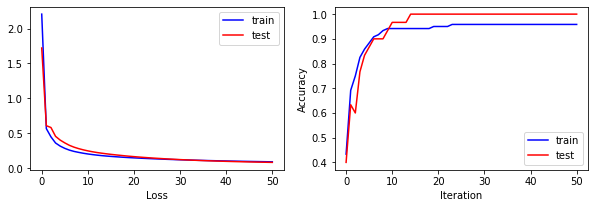

In [19]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(cce_train,color="blue",label="train")
plt.plot(cce_test,color="red",label="test")
plt.xlabel("Loss")
plt.legend()

plt.subplot(122)
plt.plot(acc_train,color="blue",label="train")
plt.plot(acc_test,color="red",label="test")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()

plt.show()